download Youtube Video

In [1]:
from pytube import YouTube
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def Download(link):
    y=YouTube(link)
    y=y.streams.get_highest_resolution()
    try:
        y.download()
    except:
        print("Error")
    print("Download Success")
link=input("Enter Link")
Download(link)

Error
Download Success


In [3]:
def download_video(link, download_path):
    try:
        yt = YouTube(link)
        stream = yt.streams.get_highest_resolution()
        stream.download(output_path=download_path)
        print("Download Success")
    except Exception as e:
        print("Error:", str(e))
if __name__ == "__main__":
    link = input("Enter Link: ")
    download_path ="D:\Course_project_ml_5th_sem\Course_project_ml_5th_sem\data"
    x=download_video(link, download_path)


Download Success


In [ ]:
import cv2
import numpy as np
from sklearn.metrics import mean_squared_error
# Load the video
vidcap = cv2.VideoCapture('data\The Crow and the Peacock story l Story in English l  Moral story l Shout story for kids l.mp4')
count = 0
i=0
success, prev_frame = vidcap.read()
a=[]
fps = int(vidcap.get(cv2.CAP_PROP_FPS))
while success:
    success, current_frame = vidcap.read()
    
    # Check if the frames are the same
    i1=current_frame.flatten()
    i2=prev_frame.flatten()
    mse=mean_squared_error(i1,i2)
    a.append(mse)
    print(mse)
   
    if mse>25:
        cv2.imwrite('frame%d.jpg' % i, current_frame)
        print('Successfully written frame', count)
        i+=1
    count += 1
    prev_frame = current_frame

print('Finished processing frames.')


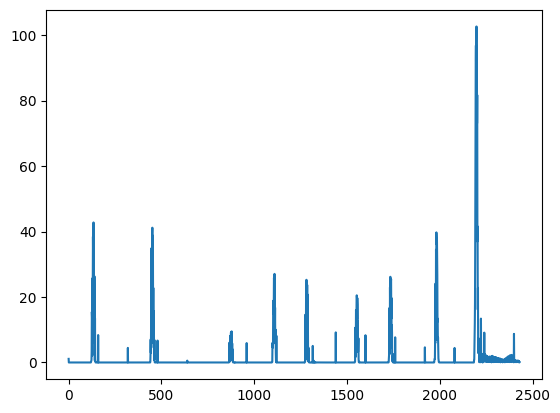

In [7]:
b=[]
for j in range(len(a)):
  b.append(j)
# print(len(a))
# print(len(b))
plt.plot(b,a)

In [25]:
import pytesseract as p
p.pytesseract.tesseract_cmd=r'C:\Users\Lenovo\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'
image=cv2.imread('data\sampletxt.png')
text=p.image_to_string(image)
print(text)

now children state should after above same long made such

point run take call together few being would walk give



In [3]:
import cv2
import pytesseract as p
p.pytesseract.tesseract_cmd=r'C:\Users\Lenovo\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'
image=cv2.imread('video_frames_2\\frame1.jpg')
text=p.image_to_string(image)
print(text)

THETHUW ATE The

forest. He was very proud of

Peacacher.




In [ ]:
import cv2
import pytesseract as p
from nltk.corpus import wordnet

p.pytesseract.tesseract_cmd = r'C:\Users\Lenovo\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'
prev=0
for j in range(38):
    img_path = r"video_frames_3\\frame{}.jpg".format(j)
    image = cv2.imread(img_path)
    text=p.image_to_string(image)
    if(prev != text):
      transcript_ = ' '.join([d['t'] for d in text])
      print(text)
    prev=text

In [23]:
import cv2
import numpy as np
original = cv2.imread("frame1.jpg")
duplicate = cv2.imread("frame9.jpg")
print(original.shape)
# 1) Check if 2 images are equals
if original.shape == duplicate.shape:
  print("The images have same size and channels")
difference = cv2.subtract(original, duplicate)
b, g, r = cv2.split(difference)
print(b)
if cv2.countNonZero(b) <= 0000 and cv2.countNonZero(g) <= 90000 and cv2.countNonZero(r) <= 90000:
 print("The images are completely Equal")
cv2.imshow("Original", original)
cv2.imshow("Duplicate", duplicate)
cv2.waitKey(0)
cv2.destroyAllWindows()

(720, 1280, 3)
The images have same size and channels
[[ 0  0  0 ...  1  0  1]
 [ 0  0  0 ...  1  1  1]
 [ 0  0  0 ...  1  1  1]
 ...
 [ 0  2  0 ... 16 10  6]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  8  3  0]]


In [16]:
from nltk.corpus import wordnet

def check_word_in_wordnet(word):
    # Check if the word is in WordNet
    synsets = wordnet.synsets(word)
    
    if synsets:
        print(f"'{word}' is present in WordNet.")
        for synset in synsets:
            print("Definition:", synset.definition())
            print("Examples:", synset.examples())
    else:
        print(f"'{word}' is not present in WordNet.")

# Word to check
word_to_check = 'example'

# Check if the word is in WordNet
check_word_in_wordnet(word_to_check)



'example' is present in WordNet.
Definition: an item of information that is typical of a class or group
Examples: ['this patient provides a typical example of the syndrome', 'there is an example on page 10']
Definition: a representative form or pattern
Examples: ['I profited from his example']
Definition: something to be imitated
Examples: ['an exemplar of success', 'a model of clarity', 'he is the very model of a modern major general']
Definition: punishment intended as a warning to others
Examples: ['they decided to make an example of him']
Definition: an occurrence of something
Examples: ['it was a case of bad judgment', 'another instance occurred yesterday', 'but there is always the famous example of the Smiths']
Definition: a task performed or problem solved in order to develop skill or understanding
Examples: ['you must work the examples at the end of each chapter in the textbook']


In [28]:
from nltk.corpus import wordnet
words=['ant','apple','afgwyufg2','aswefw','water']
for word in words:
    x=wordnet.synsets(word)
    if x:
        print('present')
    else: print('absent')

present
present
absent
absent
present


In [ ]:
!pip install git+https://github.com/openai/CLIP.git
!pip install open_clip_torch
!pip install sentence_transformers

import torch
import open_clip
import cv2
from sentence_transformers import util
from PIL import Image
# image processing model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-16-plus-240', pretrained="laion400m_e32")
model.to(device)
def imageEncoder(img):
    img1 = Image.fromarray(img).convert('RGB')
    img1 = preprocess(img1).unsqueeze(0).to(device)
    img1 = model.encode_image(img1)
    return img1
def generateScore(image1, image2):
    test_img = cv2.imread(image1, cv2.IMREAD_UNCHANGED)
    data_img = cv2.imread(image2, cv2.IMREAD_UNCHANGED)
    img1 = imageEncoder(test_img)
    img2 = imageEncoder(data_img)
    cos_scores = util.pytorch_cos_sim(img1, img2)
    score = round(float(cos_scores[0][0])*100, 2)
    return score
image1=cv2.imread('D:\Course_project_ml_5th_sem\Course_project_ml_5th_sem\\video_frames_1\\frame0.jpg')
image2=cv2.imread('D:\Course_project_ml_5th_sem\Course_project_ml_5th_sem\\video_frames_1\\frame1.jpg')
print(f"similarity Score: ", round(generateScore(image1, image2), 2))